In [62]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    "household_power_consumption.txt",
    sep=';',
    parse_dates={'datetime': ['Date', 'Time']},
    dayfirst=True,
    na_values='?',
    low_memory=False
)

df.set_index('datetime', inplace=True)

print(f"Размер датасета: {df.shape[0]:,} строк × {df.shape[1]} столбцов")
df.head(10)

/var/folders/pp/nnh10rws3jl0kc34jz4381080000gn/T/ipykernel_2315/3003906296.py:4: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(


Размер датасета: 2,075,259 строк × 7 столбцов


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0


In [63]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [64]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [65]:
df_clean = df.dropna()

print(f"Было строк: {len(df):,}")
print(f"Стало строк: {len(df_clean):,}")
print(f"Удалили: {len(df) - len(df_clean):,} (ровно 25 979)")

df = df_clean.copy()

Было строк: 2,075,259
Стало строк: 2,049,280
Удалили: 25,979 (ровно 25 979)


In [66]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

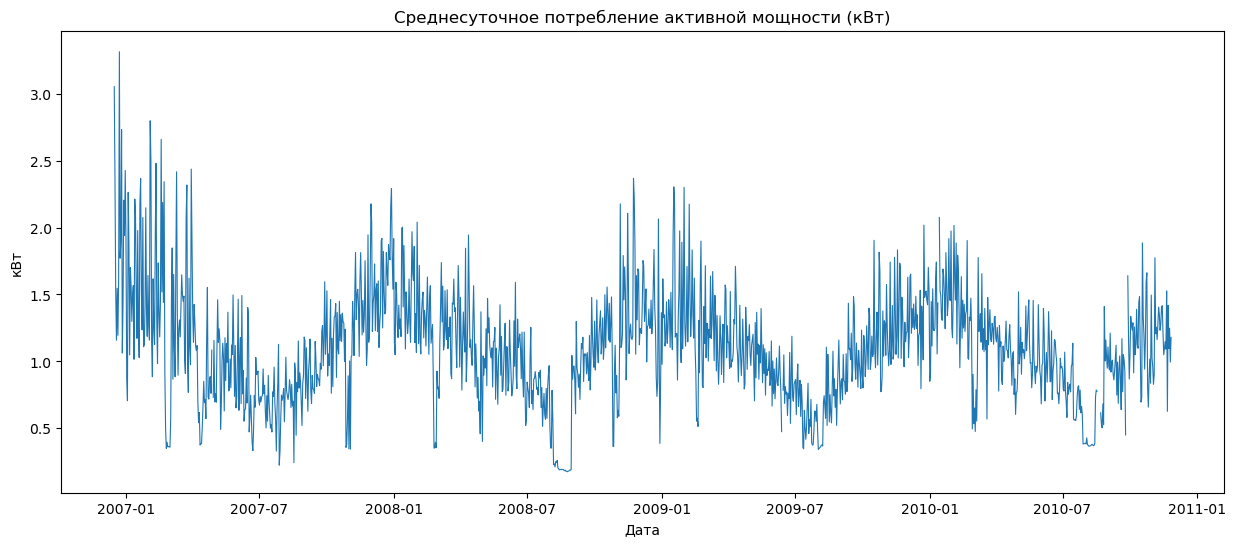

In [67]:
import matplotlib.pyplot as plt

df_day = df.resample('D').mean()  # агрегируем по дням, чтобы не тормозило

plt.figure(figsize=(15,6))
plt.plot(df_day.index, df_day['Global_active_power'], linewidth=0.8)
plt.title('Среднесуточное потребление активной мощности (кВт)')
plt.ylabel('кВт')
plt.xlabel('Дата')
plt.show()

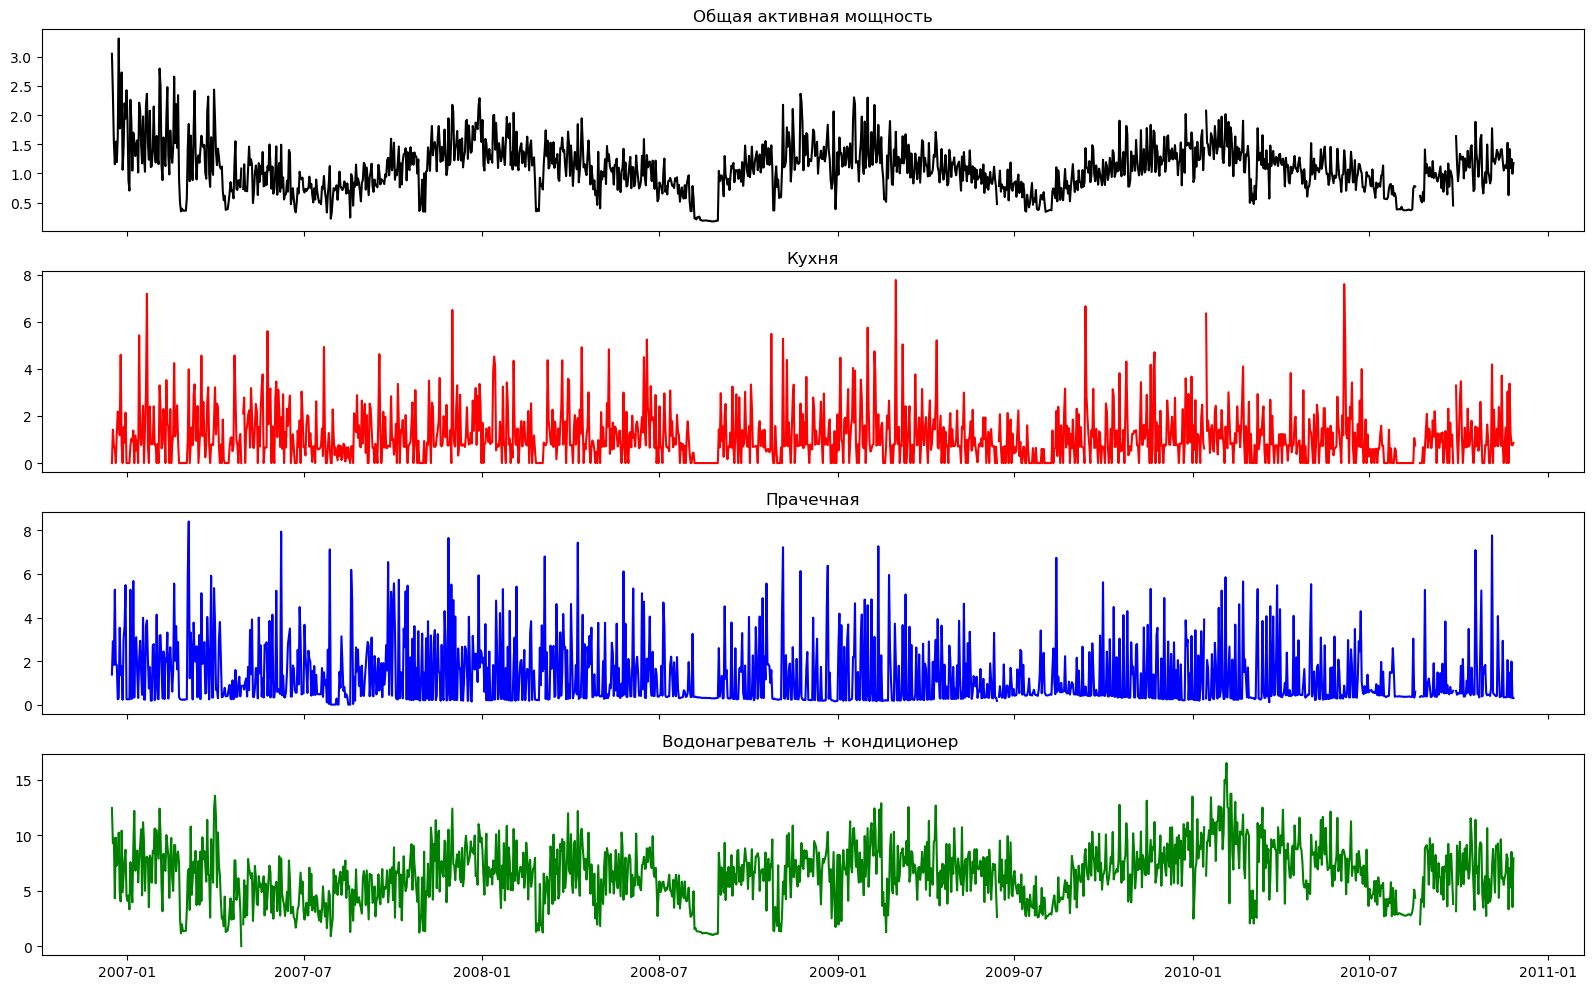

In [68]:
df_day = df.resample('D').mean()

fig, axes = plt.subplots(4, 1, figsize=(16, 10), sharex=True)
axes[0].plot(df_day.index, df_day['Global_active_power'], color='black')
axes[0].set_title('Общая активная мощность')

axes[1].plot(df_day.index, df_day['Sub_metering_1'], color='red')
axes[1].set_title('Кухня')

axes[2].plot(df_day.index, df_day['Sub_metering_2'], color='blue')
axes[2].set_title('Прачечная')

axes[3].plot(df_day.index, df_day['Sub_metering_3'], color='green')
axes[3].set_title('Водонагреватель + кондиционер ')

plt.tight_layout()
plt.show()

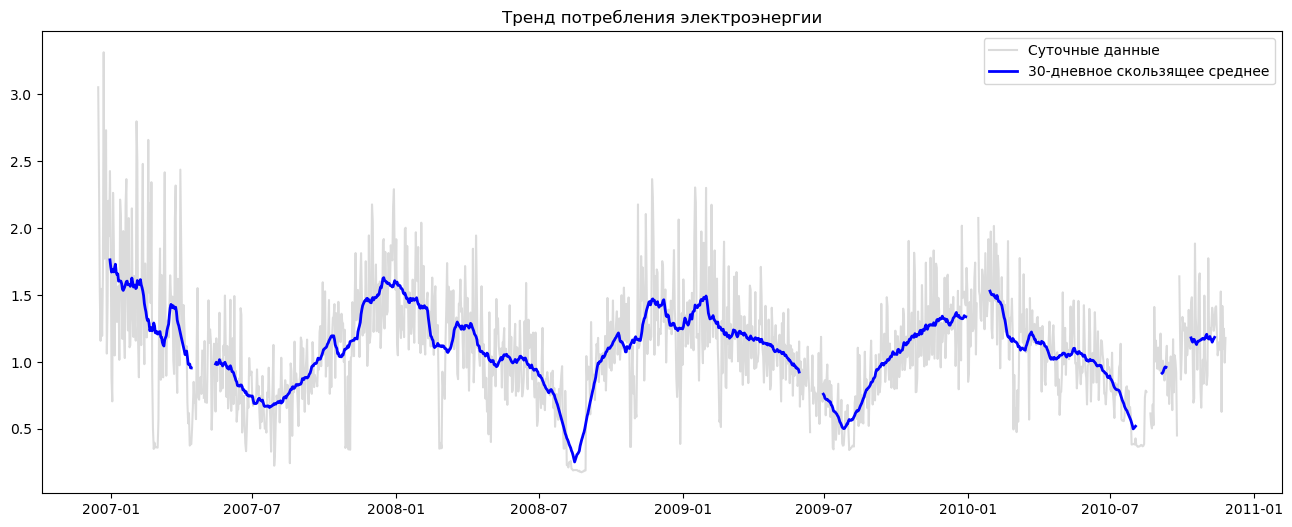

In [69]:
df_day['GAP_smooth'] = df_day['Global_active_power'].rolling(30, center=True).mean()

plt.figure(figsize=(16,6))
plt.plot(df_day['Global_active_power'], color='lightgray', alpha=0.8, label='Суточные данные')
plt.plot(df_day['GAP_smooth'], color='blue', linewidth=2, label='30-дневное скользящее среднее')
plt.title('Тренд потребления электроэнергии')
plt.legend()
plt.show()

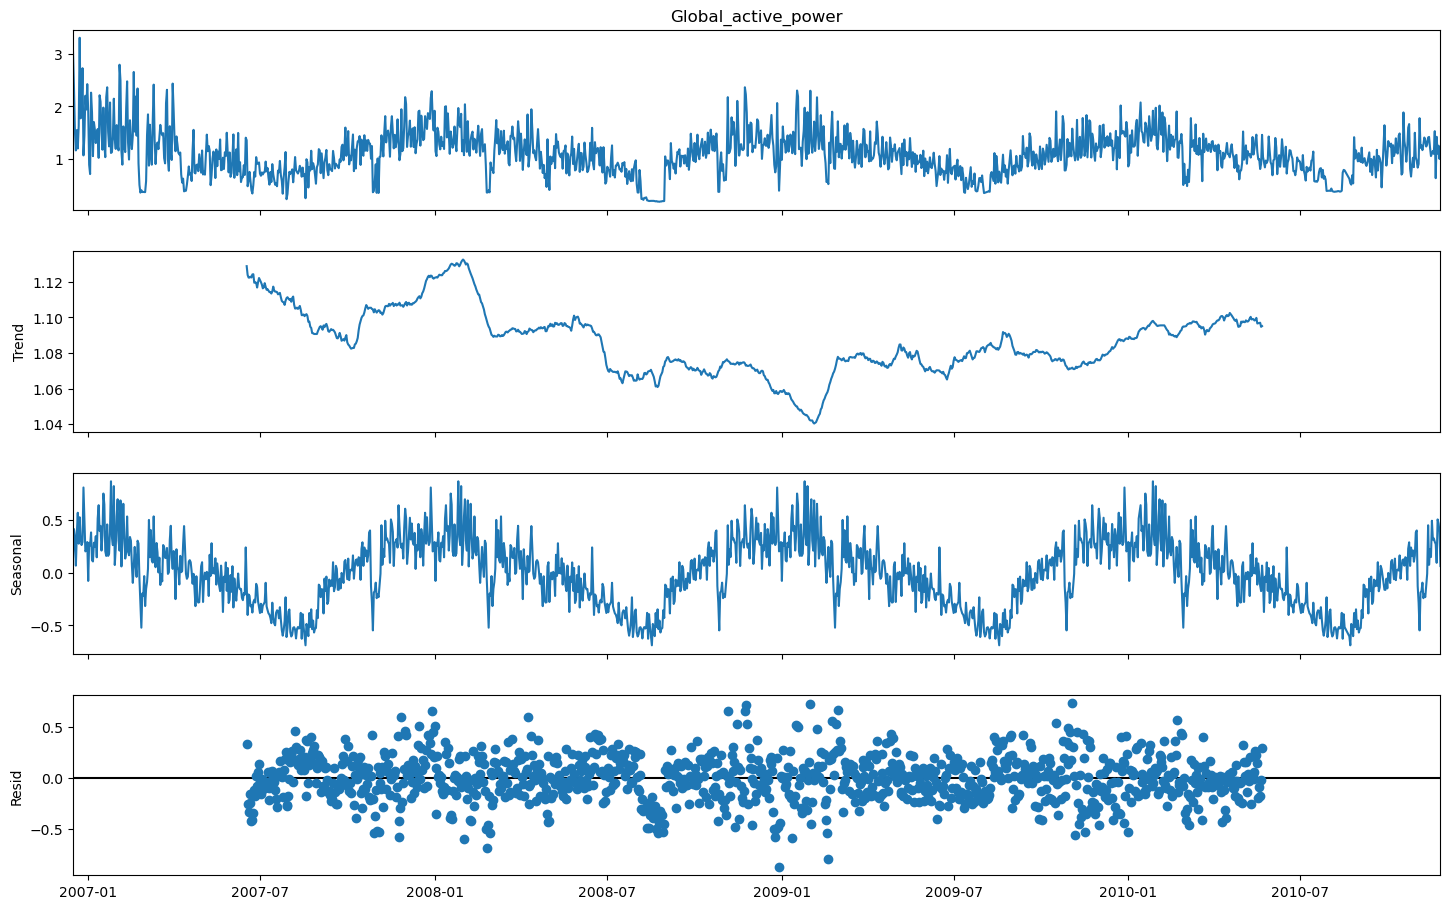

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df_day['Global_active_power'].dropna(), model='additive', period=365)

fig = decomp.plot()
fig.set_size_inches(16, 10)
plt.show()

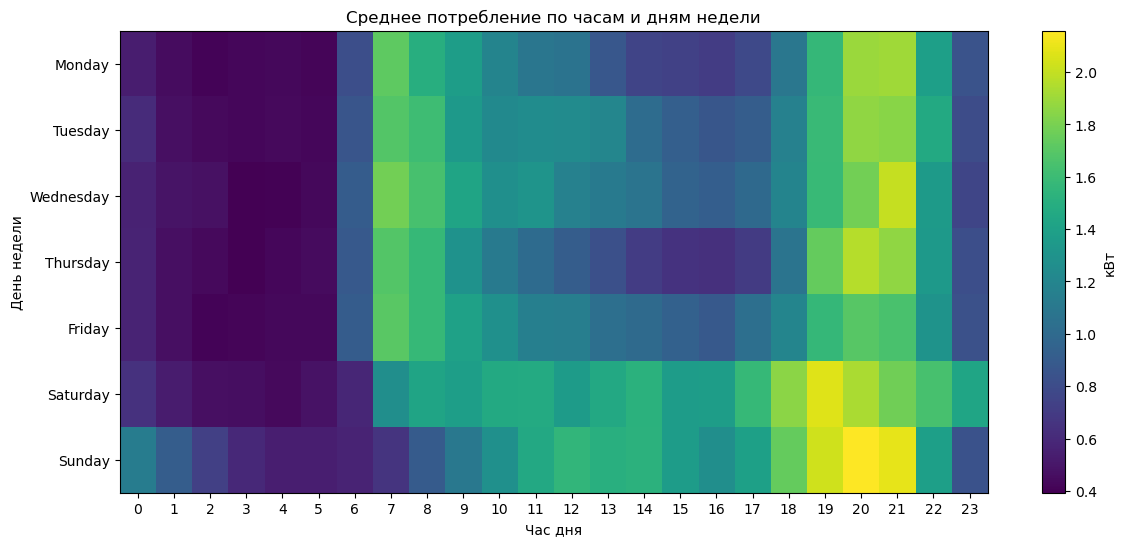

In [71]:
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()

hourly_weekly = df.groupby(['weekday', 'hour'])['Global_active_power'].mean().unstack()

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_weekly = hourly_weekly.reindex(order)

plt.figure(figsize=(14,6))
plt.imshow(hourly_weekly, aspect='auto', cmap='viridis')
plt.colorbar(label='кВт')
plt.xticks(range(24))
plt.yticks(range(7), hourly_weekly.index)
plt.xlabel('Час дня')
plt.ylabel('День недели')
plt.title('Среднее потребление по часам и дням недели')
plt.show()

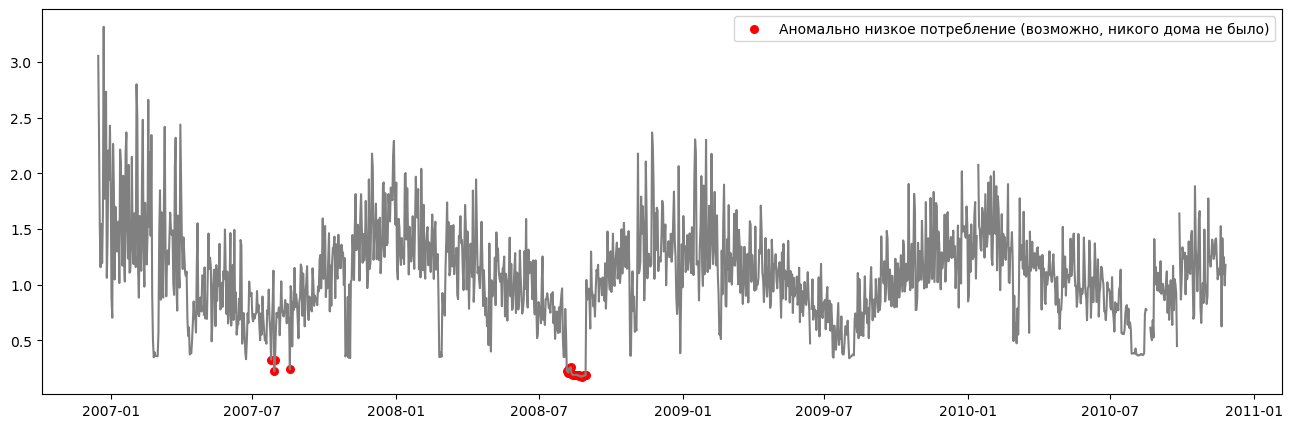

In [72]:
df_day['anomaly'] = df_day['Global_active_power'] < df_day['Global_active_power'].quantile(0.02)

plt.figure(figsize=(16,5))
plt.plot(df_day['Global_active_power'], color='gray')
plt.scatter(df_day[df_day['anomaly']].index,
            df_day[df_day['anomaly']]['Global_active_power'],
            color='red', s=30, label='Аномально низкое потребление (возможно, никого дома не было)')
plt.legend()
plt.show()

In [73]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

df_day = df[['Global_active_power', 'Global_reactive_power', 'Voltage',
             'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']] \
            .resample('D').mean()

df_day = df_day.dropna()

series = df_day['Global_active_power'].copy()

n_days_total = len(df_day)
val_size  = 30
test_size = 30

train = df_day.iloc[: -(val_size + test_size)]
val   = df_day.iloc[-(val_size + test_size): -test_size]
test  = df_day.iloc[-test_size:]

train_full = series.iloc[:-30]

print(f"Всего дней в датасете: {n_days_total}")
print(f"Train:  {train.index[0].date()} → {train.index[-1].date()}  |  {len(train)} дней")
print(f"Val:    {val.index[0].date()} → {val.index[-1].date()}   |  {len(val)} дней")
print(f"Test:   {test.index[0].date()} → {test.index[-1].date()}  |  {len(test)} дней")

Всего дней в датасете: 1433
Train:  2006-12-16 → 2010-09-25  |  1373 дней
Val:    2010-09-28 → 2010-10-27   |  30 дней
Test:   2010-10-28 → 2010-11-26  |  30 дней


In [74]:
# Простое экспоненциальное сглаживание (только уровень)
model = SimpleExpSmoothing(train_full).fit(smoothing_level=0.2, optimized=False)


# Прогноз на последний месяц
forecast = model.forecast(len(test))

# Метрики
mae  = mean_absolute_error(test['Global_active_power'], forecast)
rmse = np.sqrt(mean_squared_error(test['Global_active_power'], forecast))

print(f"\nПростое экспоненциальное сглаживание (α = 0.2):")
print(f"MAE  = {mae:.4f} кВт")
print(f"RMSE = {rmse:.4f} кВт")


Простое экспоненциальное сглаживание (α = 0.2):
MAE  = 0.2072 кВт
RMSE = 0.2613 кВт


/opt/miniconda3/envs/Less_25/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/Less_25/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/miniconda3/envs/Less_25/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [75]:
from statsmodels.tsa.holtwinters import Holt

# damped_trend=True — очень важно для этого датасета! (тренд замедляется со временем)
model_holt = Holt(
    train_full,
    initialization_method="estimated",  # лучше, чем legacy-heuristic
    damped_trend=True                  # демпфирование тренда (φ < 1)
).fit(
    smoothing_level=0.3,    # α
    smoothing_trend=0.05,   # β
    damping_trend=0.98,     # φ — как сильно гасится тренд
    optimized=False
)

# 4. Прогноз
forecast_holt = model_holt.forecast(30)

# 5. Метрики
mae_holt  = mean_absolute_error(test['Global_active_power'], forecast_holt)
rmse_holt = np.sqrt(mean_squared_error(test['Global_active_power'], forecast_holt))

print(f"\nМетод Хольта (двойное экспоненциальное сглаживание)")
print(f"MAE  = {mae_holt:.4f} кВт")
print(f"RMSE = {rmse_holt:.4f} кВт")


Метод Хольта (двойное экспоненциальное сглаживание)
MAE  = 0.3161 кВт
RMSE = 0.3695 кВт


/opt/miniconda3/envs/Less_25/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/Less_25/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/miniconda3/envs/Less_25/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
